In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split

### Exemplo linearmente separável

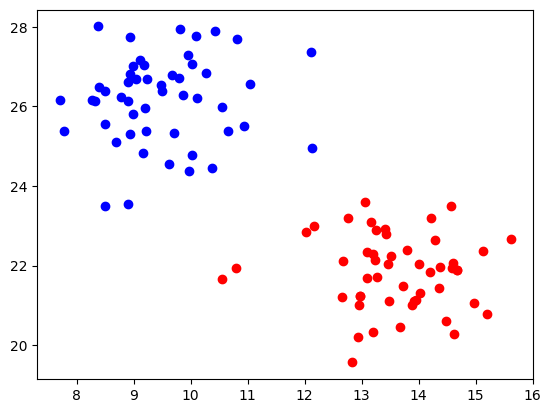

In [16]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 30), random_state=6661)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')
plt.show()

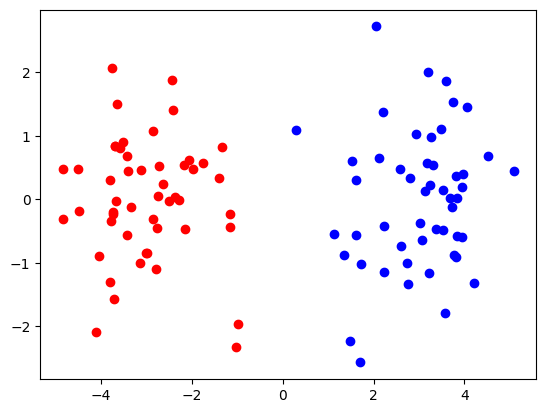

In [17]:
# pca over data
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.plot(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0], 'ro')
plt.plot(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1], 'bo')
plt.show()

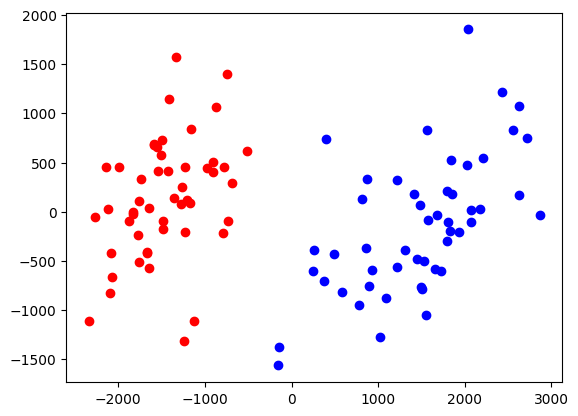

In [18]:
# kernel pca with polynomial kernel
kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
kpca.fit(X)
X_kpca = kpca.transform(X)
plt.plot(X_kpca[:, 0][y == 0], X_kpca[:, 1][y == 0], 'ro')
plt.plot(X_kpca[:, 0][y == 1], X_kpca[:, 1][y == 1], 'bo')
plt.show()

### Exemplo não linearmente separável

**Fonte:** https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

In [19]:
X2, y2 = datasets.make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=6661)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify=y2, random_state=0)

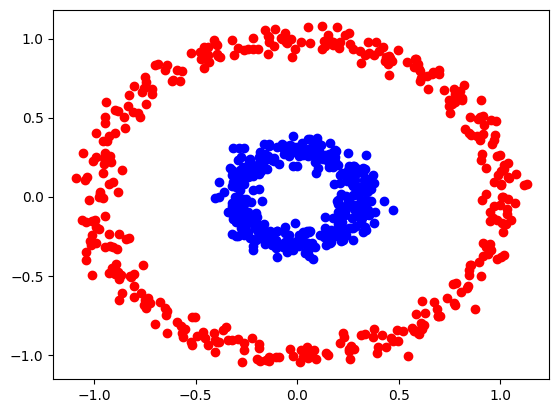

In [32]:
# plot train data
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'ro')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bo')

In [20]:
pca2 = PCA(n_components=2)
# poly deu matriz mal condicionada
kernel_pca2 = KernelPCA(
    n_components=None, kernel="rbf", gamma=10
)

X_test_pca = pca2.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca2.fit(X_train).transform(X_test)

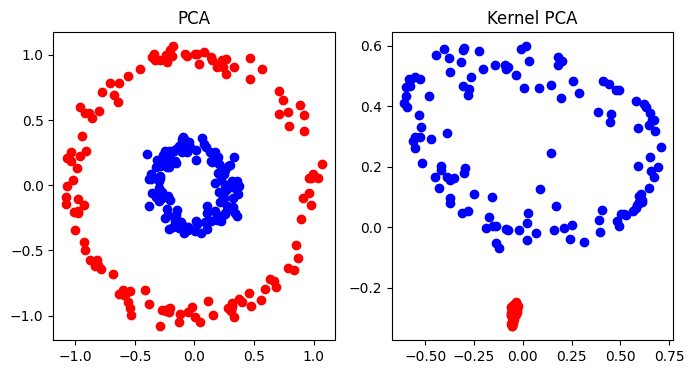

In [21]:
# plot
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("PCA")
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color="red")
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color="blue")
plt.subplot(122)
plt.title("Kernel PCA")
plt.scatter(X_test_kernel_pca[y_test == 0, 0], X_test_kernel_pca[y_test == 0, 1], color="red")
plt.scatter(X_test_kernel_pca[y_test == 1, 0], X_test_kernel_pca[y_test == 1, 1], color="blue")
plt.show()

In [ ]:
# moons?